In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as sme

In [2]:
df = pd.read_csv('wine.csv')
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Q1 Write down the meta information about the “wine.csv” data file available in the UCI repository

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are
* Alcohol
* Malic acid
* Ash
* Alcalinity of ash
* Magnesium
* Total phenols
* Flavanoids
* Nonflavanoid phenols
* Proanthocyanins
* Color intensity
* Hue
* OD280/OD315 of diluted wines
* Proline

## Q2 Tabulate and visualize the distribution of the numeric variables

In [3]:
x = df.drop('Class', axis = 1)
y = df.pop('Class')

x.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


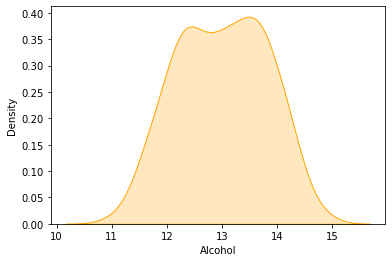

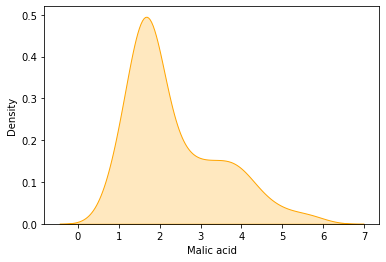

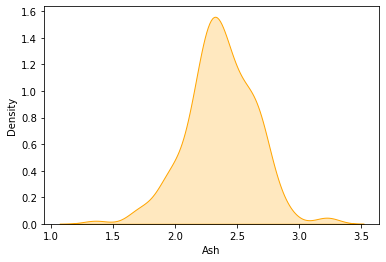

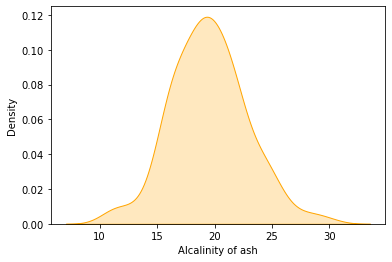

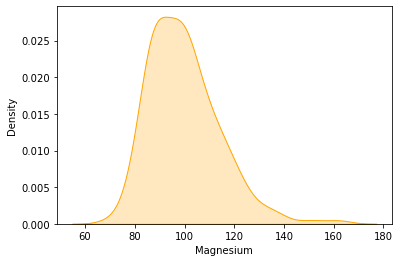

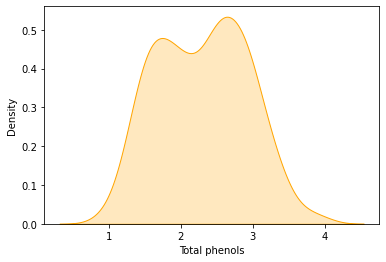

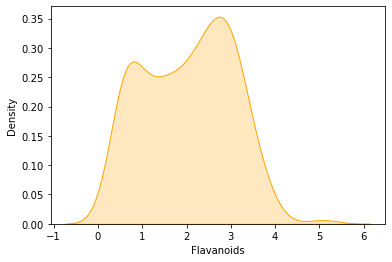

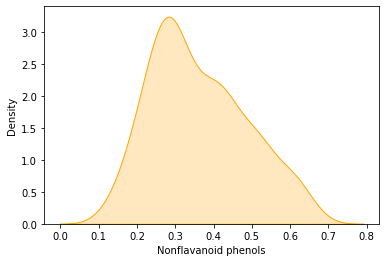

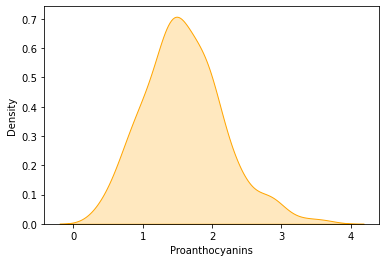

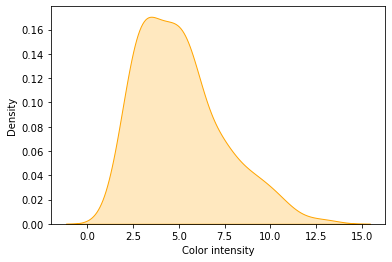

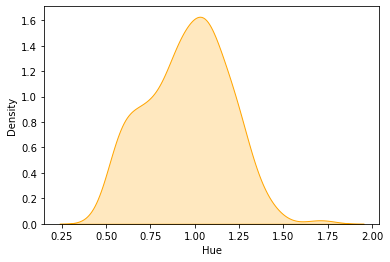

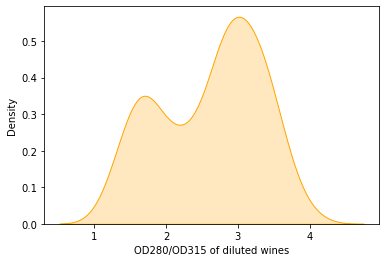

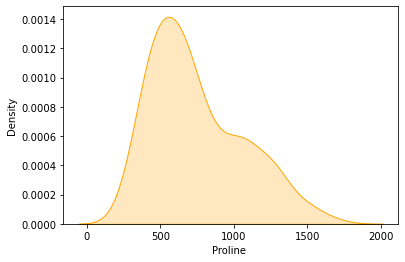

In [4]:
for i in x.columns:
    sns.kdeplot(data = df, x = i, shade = True, color = 'orange')
    plt.show()

## Q3 Perform the required preprocessing , 70,30 split and build a classifier using the Multi-Layer Perceptron Classifier model available in SciKit Learn. Use 3 layers with the same number of neurons as there are features along with 500 max iterations.

In [5]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 245)

In [6]:
sc = StandardScaler()
trainscaled_x = sc.fit_transform(train_x)
testscaled_x = sc.transform(test_x)

In [7]:
clf = MLPClassifier(hidden_layer_sizes = (12, 12, 12), activation = 'relu', max_iter = 500, random_state = 12).fit(trainscaled_x, train_y)
pred_y = clf.predict(testscaled_x)

## Q4 Tabulate the precision, recall and F1-score.

In [8]:
print(sme.precision_score(test_y, pred_y, average = 'micro'))
print(sme.recall_score(test_y, pred_y, average = 'micro'))
print(sme.f1_score(test_y, pred_y, average = 'micro'))

0.9814814814814815
0.9814814814814815
0.9814814814814815


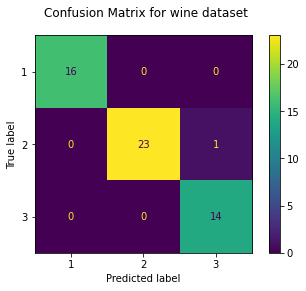

In [9]:
fig = sme.plot_confusion_matrix(clf, testscaled_x, test_y, display_labels= ['1', '2', '3'])
fig.figure_.suptitle("Confusion Matrix for wine dataset")
plt.show()

## Q5 Display the MLP weights and biases after training your model

In [10]:
print("The weights are: ")
clf.coefs_

The weights are: 


[array([[-5.52300000e-01,  4.14206962e-01, -4.16271644e-01,
          1.73623395e-01, -2.92288670e-01,  4.04787245e-01,
          3.92087590e-01, -6.06494753e-01,  3.00586273e-01,
         -4.13138587e-01, -4.63459704e-02, -4.12152188e-02],
        [ 2.46409238e-01,  5.49445623e-01, -5.89401857e-01,
          1.30011269e-01,  2.07126197e-01, -8.03807987e-02,
          3.48321681e-01, -4.32890066e-01,  2.75788130e-01,
         -4.53558092e-01, -3.52544561e-01, -5.05471365e-01],
        [-3.29585628e-01,  3.28655122e-01, -2.23124957e-01,
          2.96650899e-01,  2.67969454e-02,  1.41497459e-01,
          2.94220413e-01, -8.07806201e-02, -5.94743691e-02,
          4.06141846e-01,  1.14984758e-01,  2.73779312e-01],
        [ 3.93300818e-01,  1.37778711e-01, -1.43405617e-01,
         -1.03997403e-01,  1.33621882e-01,  4.25059325e-01,
         -1.49110605e-01,  6.59369167e-01,  7.16390243e-02,
         -1.43461472e-02, -2.39870831e-01, -4.50076030e-03],
        [-1.25014314e-02, -2.7908467

In [11]:
print("The biases are: ")
clf.intercepts_

The biases are: 


[array([ 0.03532605,  0.67961887,  0.03480179, -0.01740302,  0.23004702,
         0.08322972, -0.36902445,  0.14281528,  0.33777451,  0.46423851,
         0.41207525, -0.17207771]),
 array([-0.14880017,  0.04910913, -0.34560734,  0.24068872, -0.0148896 ,
         0.11705113,  0.51156954,  0.32301476, -0.16974071,  0.26559502,
         0.15015686,  0.24579811]),
 array([-0.31982334, -0.17911067,  0.1921862 ,  0.00645889, -0.26451417,
        -0.03536642,  0.26095586, -0.0839324 , -0.28484293,  0.33581026,
        -0.25150903, -0.38149672]),
 array([-0.51897405,  0.43505103, -0.38771352])]